In [1]:
import pandas as pd
import keras

C:\Users\Praveen\Anaconda_3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

### Keras libararies have some already loaded datasets which can be consumed directly.

For more details : https://keras.io/datasets/

### Fashion MNIST

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

The class labels are:

    Label	Description
    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot

In [3]:
### loading datasets

from keras.datasets import fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 10s 2us/step


### identifying shape and type train and test data

In [16]:
# Train dataset

print("The dimensions of X_train :{}".format(X_train.shape))
print("The shape of X_train:{}".format(type(X_train)))
print("The shape of y_train:{}".format(y_train.shape))

The dimensions of X_train :(60000, 28, 28)
The shape of X_train:<class 'numpy.ndarray'>
The shape of y_train:(60000,)


In [17]:
# Test dataset

print("The dimensions of X_train :{}".format(X_test.shape))
print("The shape of X_train:{}".format(type(X_test)))
print("The shape of y_train:{}".format(y_test.shape))

The dimensions of X_train :(10000, 28, 28)
The shape of X_train:<class 'numpy.ndarray'>
The shape of y_train:(10000,)


In [27]:
# Let's take one record and check how does it look

print("The dimensions of X_train:{}".format(X_train[0].ndim))
X_train[0]

# The values are in range of 0-255 as the data type is uint8

The dimensions of X_train:2


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

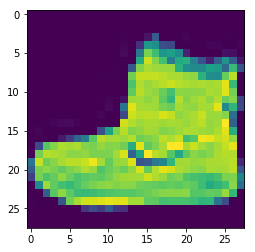

In [28]:
### what's the visual reprentation of this data?

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

### Data Preprocessing

In [30]:
## We can't feed the train data in the current shape, the records needs to be flatten in one dimensional array

X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')


In [31]:
## Keeping the range between 0-1

X_train = X_train/255
X_test = X_test/255

In [32]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
## Converting the target into categorical variables

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
print("y_train dimension:{}".format(y_train.ndim))
print("y_train shape:{}".format(y_train.shape))

y_train dimension:2
y_train shape:(60000, 10)


### Building Simple Neural Network to classify images

#### There are two main types of models available in Keras: 
    1. Sequential model : 
        It's a linear stack of layers. 
        Link : https://keras.io/getting-started/sequential-model-guide/
        
    2. Model class used with the functional API: 
        In the functional API, given some input tensor(s) and output tensor(s), you can instantiate a Model.
        Link :  https://keras.io/getting-started/functional-api-guide/
        
    
    

### Building Sequential Model

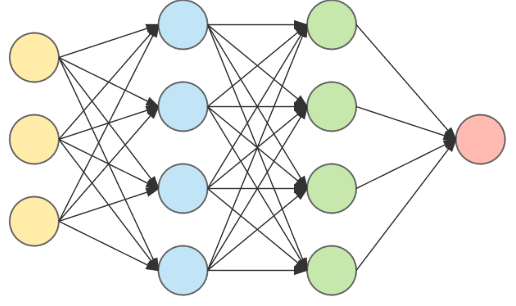

In [43]:
from IPython.display import Image
Image(filename='neuralnetwork.png')

#### I am trying to build Neural Network with below features  :
       1. 784 Input nodes
       2. 2 Hidden layers : 784 and 100
       3. 10 output nodes
 
 For the hidden layers, the activation function would be : **ReLu**
 
 and for the output layer, the activation function would be : **softmax**
 
As this is the multiclass classification problem, the loss function would be **categorical_crossentropy**

and for the binary classification, the loss function would be **binary_crossentropy**
            

In [40]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [41]:
# compiling model
model.compile(optimizer ='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [42]:
# fit model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.4717 - acc: 0.8296
Epoch 2/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.3599 - acc: 0.8682
Epoch 3/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.3214 - acc: 0.8821
Epoch 4/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.2972 - acc: 0.8888
Epoch 5/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.2776 - acc: 0.8959
Epoch 6/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.2653 - acc: 0.8994
Epoch 7/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.2518 - acc: 0.9045 4s - loss: 0.2520 - a - ETA:
Epoch 8/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2307 - acc: 0.9125
Epoch 10/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.2232 - acc: 0.9157


In [46]:
## I have selected 10 epochs which gives the accuracy of 91% on the training dataset.
## Hidden layers, nodes, epochs, all these parameters can be tuned futher.

In [47]:
## Evaluate model

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 8s 824us/step


[0.34790151770114897, 0.8841]

In [48]:
## the accuracy on the test dataset is 88.4%c!!! Overfitting !!!

In [49]:
model.metrics_names

['loss', 'acc']